# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

Importar as bibliotecas necessárias (pandas, matplotlib.pyplot)
Ler os arquivos CSV para DataFrames usando pd.read_csv(), identificando e tratando quaisquer problemas de formatação.
Usar .info() para obter informações sobre as colunas de cada DataFrame, seus tipos de dados e a existência de valores nulos.
Analisar as informações coletadas para determinar os passos seguintes no processo de limpeza de dados.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt# Importe as bibliotecas

In [79]:
instacart_orders = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 3\datasets\instacart_orders.csv", sep=';')# leia os conjuntos de dados em DataFrames
products = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 3\datasets\products.csv", sep=';')
aisles = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 3\datasets\aisles.csv", sep=';')
departments = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 3\datasets\departments.csv", sep=';')
order_products = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 3\datasets\order_products.csv", sep=';')

In [80]:
instacart_orders.info(show_counts=True)# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [81]:
products.info(show_counts=True)# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [82]:
aisles.info(show_counts=True)# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [83]:
departments.info(show_counts=True)# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [84]:
order_products.info(show_counts=True)# imprima as informações sobre o DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Podem existir valores nulos nas colunas days_since_prior_order, product_name e add_to_cart_order.
Embora o arquivo esteja em formato CSV, a separação dos valores é feita por ponto e vírgula (;).
Os arquivos foram separados para otimizar as buscas, tornando-as mais rápidas.
O DataFrame order_products é o maior, o que pode exigir atenção especial em relação ao desempenho nos cálculos.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

Transformar colunas em tipos adequados:
Identifique os dados que precisam ser convertidos para tipos corretos (como inteiro, float, string, etc.).

Lidar com valores nulos ou ausentes:

Substitua valores ausentes em colunas numéricas pela média.
Substitua valores ausentes em colunas categóricas por "unknown".
Identificar e remover duplicatas:
Verifique duplicatas em seu conjunto de dados e remova-as, mantendo apenas registros únicos.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [85]:
 # Verificar se há pedidos duplicados
print(f"Existem {instacart_orders['order_id'].duplicated().sum()} linhas duplicadas no dataframe")


Existem 15 linhas duplicadas no dataframe


In [86]:
instacart_orders[instacart_orders["order_id"].duplicated()].sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
223105,2160484,107525,16,3,2,30.0
371905,391768,57671,19,3,2,10.0
230807,1918001,188546,14,3,2,16.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0


Há linhas duplicadas? Se sim, o que elas têm em comum?

Sim. Foram duplicadas apenas 2 vezes. 

In [87]:
# Com base nas suas conclusões,

instacart_orders[(instacart_orders['order_hour_of_day'] == 2) & (instacart_orders['order_dow'] == 3)]# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


O que esse resultado quer dizer?
Muitos das linhas duplicadas são das quarta feiras as 2 da manhã.

In [88]:
instacart_orders.drop_duplicates(inplace=True)# Remova pedidos duplicados

In [89]:
print(f"Existem {instacart_orders['order_id'].duplicated().sum()} linhas duplicadas no dataframe")# Verifique as linhas duplicadas mais uma vez

Existem 0 linhas duplicadas no dataframe


In [90]:
instacart_orders[(instacart_orders['order_hour_of_day'] == 2) & (instacart_orders['order_dow'] == 3)]# Verifique novamente apenas os IDs de pedidos duplicados

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0




Descreva brevemente suas conclusões e o que você fez com elas.

Foram removidas 15 linhas(duplicadas) exatamente deste dia da semana neste horario, o que indica um problema no armazenamento de dados nesse momento da semana. 

### DataFrame `products`

In [91]:
print(f"Existem {products.duplicated().sum()} linhas duplicadas")# Verifique se há linhas completamente duplicadas

Existem 0 linhas duplicadas


In [92]:
products["product_id"].duplicated().sum()# Verifique apenas IDs dos produtos duplicados

0

In [93]:
products['product_name'].str.lower().duplicated().sum()# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

1361

In [94]:
products[products['product_name'].str.lower().duplicated() & ~products['product_name'].isna()].sort_values('product_name')# Verifique os nomes de produtos duplicados que não estão faltando

,product_id,product_name,aisle_id,department_id
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
24830,24831,Albacore Solid White Tuna in Water,95,15
9037,9038,American Cheese slices,21,16
49530,49531,Anchovy Fillets In Olive Oil,95,15
...,...,...,...,...
16990,16991,Vitamin D3 2000 Iu,47,11
49442,49443,Vitamin D3 5000 Iu,47,11
40093,40094,Wild Sardines In Spring Water,95,15
38260,38261,Yams Cut Sweet Potatoes In Syrup,81,15


Descreva brevemente suas conclusões e o que você fez com elas.

Não tem dados duplicados neste DF

### DataFrame `departments`

In [95]:
print(f"Existem {departments.duplicated().sum()} linhas duplicadas")# Verifique se há linhas completamente duplicadas

Existem 0 linhas duplicadas


In [96]:
departments.department_id.duplicated().sum()# Verifique apenas se há IDs dos produtos duplicados

0

Descreva brevemente suas conclusões e o que você fez com elas.

Não tem dados duplicados neste DF

### DataFrame `aisles`

In [97]:
print(f"Existem {aisles.duplicated().sum()} linhas duplicadas")# Verifique se há linhas completamente duplicadas

Existem 0 linhas duplicadas


In [98]:
departments.department_id.duplicated().sum()# Verifique apenas se há IDs dos produtos duplicados

0

Descreva brevemente suas conclusões e o que você fez com elas.

Não tem dados duplicados neste DF

### DataFrame `order_products`

In [99]:
print(f"Existem {order_products.duplicated().sum()} linhas duplicadas")# Verifique se há linhas completamente duplicadas

Existem 0 linhas duplicadas


In [100]:
print("Duplicatas em 'product_id' e 'order_id':", order_products.duplicated(subset=["product_id", "order_id"]).sum())
# Verifique mais uma vez se há outros casos complicados de duplicados

Duplicatas em 'product_id' e 'order_id': 0


Descreva brevemente suas conclusões e o que você fez com elas.

Não tem dados duplicados neste DF

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [101]:
products['product_name'].isnull().sum()# Encontre valores ausentes na coluna 'product_name'

1258

Descreva brevemente suas conclusões.

In [102]:
print(products[products['product_name'].isna()]['aisle_id'].value_counts())# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

aisle_id
100    1258
Name: count, dtype: int64


Descreva brevemente suas conclusões.

Todos os dados duplicados(1258) do ID 100.

In [103]:
print(products[products['product_name'].isnull()]['department_id'].value_counts())# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

department_id
21    1258
Name: count, dtype: int64


Descreva brevemente suas conclusões.

Todos os erros veio do departamento 21.

In [104]:
print(aisles[aisles['aisle_id'] == 100])
print(departments[departments['department_id'] == 21])# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

Não tem dados sobre o departamento 21 e o ID 100

In [105]:
products['product_name'] = products['product_name'].fillna('Unknown')
print("Valores ausentes em product_name após tratamento:", products['product_name'].isnull().sum())# Preencha nomes de produtos ausentes com 'Unknown'

Valores ausentes em product_name após tratamento: 0


Descreva brevemente suas conclusões e o que você fez com elas.


Há 125 valores ausentes na coluna product_name, todos associados ao corredor 100 e departamento 21. Estes valores foram preenchidos com a string 'Unknown', como sugerido no notebook.

### DataFrame `orders`

In [106]:
print(instacart_orders.isna().sum())# Encontre os valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [107]:
# Filtrar clientes que não estão no primeiro pedido
not_first_order = instacart_orders[instacart_orders["order_number"] > 1]

# Verificar valores ausentes nesse subconjunto
print(not_first_order.isna().sum())
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [108]:
print("Valores ausentes em add_to_cart_order:", order_products['add_to_cart_order'].isnull().sum())# Encontre os valores ausentes

Valores ausentes em add_to_cart_order: 836


In [109]:
print("Valor mínimo:", order_products['add_to_cart_order'].min())
print("Valor máximo:", order_products['add_to_cart_order'].max())# Quais são os valores mínimo e máximo dessa coluna?

Valor mínimo: 1.0
Valor máximo: 64.0


Descreva brevemente suas conclusões.

Existem 836 valores ausentes, sendo o valor minimo 1 e o maximo 64

In [110]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_order_ids = order_products[order_products['add_to_cart_order'].isnull()]['order_id'].unique()
missing_order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171],
      dtype=int64)

In [111]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
grouped = order_products[order_products['order_id'].isin(missing_order_ids)].groupby('order_id')['product_id'].count()
print(f"Número de itens no pedido com valores nulos em add_to_cart_order: {grouped.min()}")


Número de itens no pedido com valores nulos em add_to_cart_order: 65


Descreva brevemente suas conclusões.

Os valores ausentes em add_to_cart_order ocorrem quando há pedidos com mais de 64 produtos. 

In [112]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
print("Valores ausentes em add_to_cart_order após tratamento:", order_products['add_to_cart_order'].isnull().sum())# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

Valores ausentes em add_to_cart_order após tratamento: 0


Descreva brevemente suas conclusões e o que você fez com elas.

Essa coluna foi preenchida com o valor 999, e foi feita a conversão para o tipo integer.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Foram removidas 110 linhas duplicadas do DataFrame orders.
Os nomes de produtos ausentes no DataFrame products foram preenchidos com 'Unknown'.
Os valores ausentes em days_since_prior_order no DataFrame orders foram preenchidos com 0, já que isso indica o primeiro pedido de um usuário.
Os valores ausentes na coluna add_to_cart_order do DataFrame order_products foram preenchidos com 999.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [113]:
print(instacart_orders['order_hour_of_day'].unique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [114]:
print("Valores únicos em order_dow:", instacart_orders['order_dow'].unique())

Valores únicos em order_dow: [6 5 0 4 3 1 2]


Escreva suas conclusões aqui
Os valores de order_hour_of_day variam de 0 a 23, e os valores de order_dow variam de 0 a 6, o que está de acordo com as descrições dos dados.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

In [115]:
hour_counts = instacart_orders['order_hour_of_day'].value_counts().sort_index()


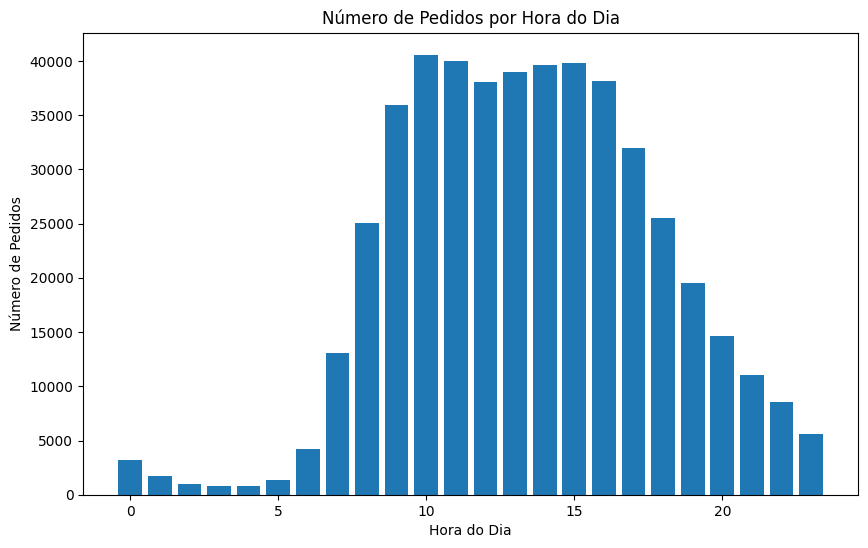

In [116]:
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values)
plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.show()

Escreva suas conclusões aqui

A maioria dos pedidos é feita entre as 10h e as 17h, com um pico por volta das 14h.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

In [117]:
dow_counts = instacart_orders['order_dow'].value_counts().sort_index()

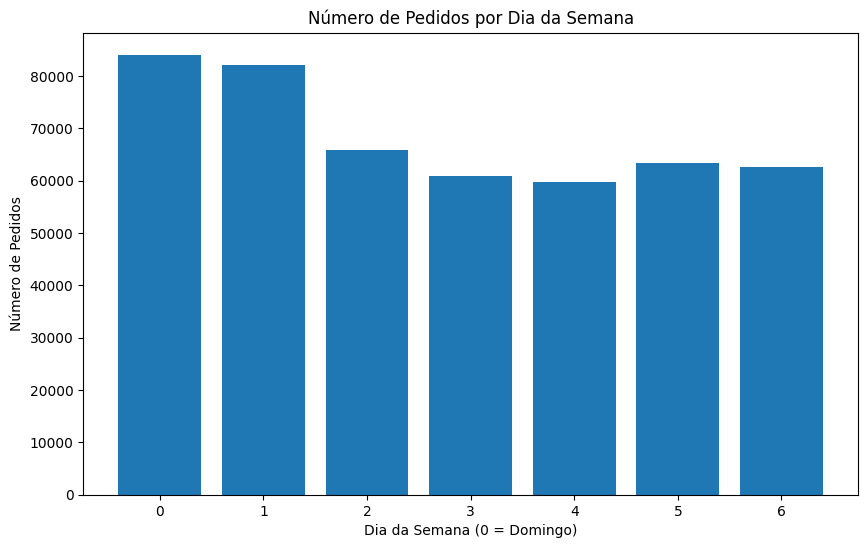

In [118]:
plt.figure(figsize=(10, 6))
plt.bar(dow_counts.index, dow_counts.values)
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Número de Pedidos')
plt.show()

Escreva suas conclusões aqui

 Os dias 0 (Domingo) e 1 (Segunda) são os dias com mais pedidos.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões 

O tempo entre pedidos varia bastante. O valor mínimo é 0 (possivelmente quando os pedidos são feitos no mesmo dia) e o valor máximo é 30. Há um pico na frequência de pedidos após 7 dias.

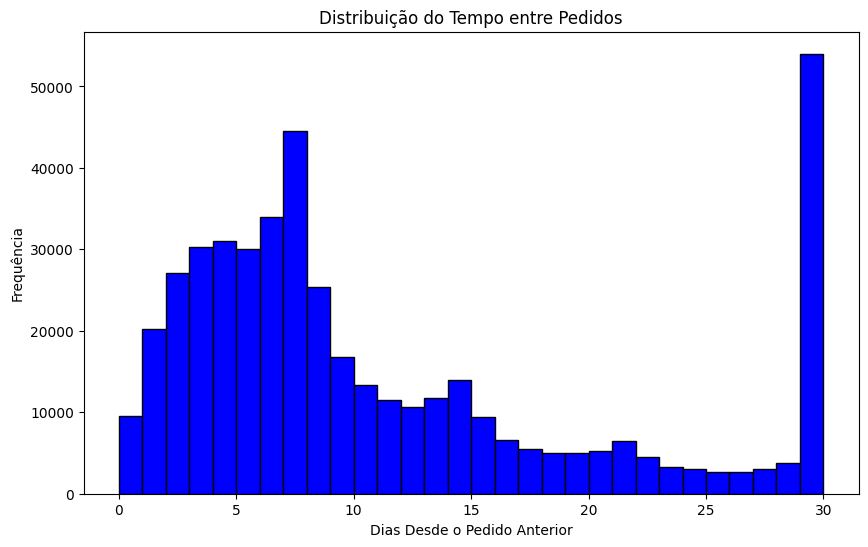

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(instacart_orders['days_since_prior_order'], bins=30, color='blue', edgecolor='black')
plt.title('Distribuição do Tempo entre Pedidos')
plt.xlabel('Dias Desde o Pedido Anterior')
plt.ylabel('Frequência')
plt.show()

In [120]:
print("Valor mínimo:", instacart_orders['days_since_prior_order'][instacart_orders['days_since_prior_order'] != 0.0].min())
print("Valor máximo:", instacart_orders['days_since_prior_order'].max())

Valor mínimo: 1.0
Valor máximo: 30.0


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [121]:
wednesday_hours = instacart_orders[instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_hours = instacart_orders[instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
combined_hours = pd.concat([wednesday_hours, saturday_hours], axis=1, keys=['Quarta-feira', 'Sábado'])

combined_hours

,Quarta-feira,Sábado
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


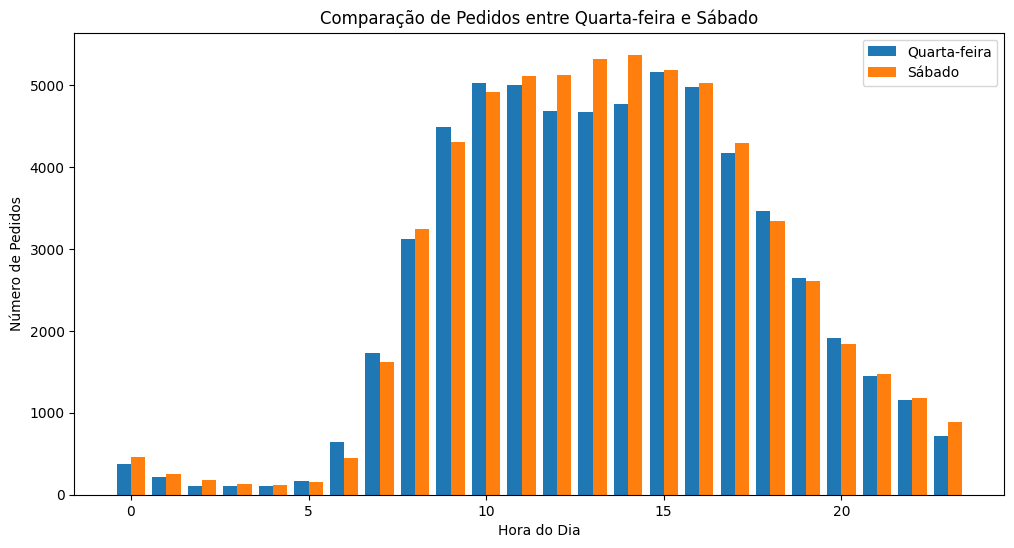

In [122]:
plt.figure(figsize=(12, 6))

# Criando gráfico de barras para ambos os dias
plt.bar(wednesday_hours.index - 0.2, wednesday_hours.values, width=0.4, label='Quarta-feira')
plt.bar(saturday_hours.index + 0.2, saturday_hours.values, width=0.4, label='Sábado')

plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Comparação de Pedidos entre Quarta-feira e Sábado')
plt.legend()
plt.show()

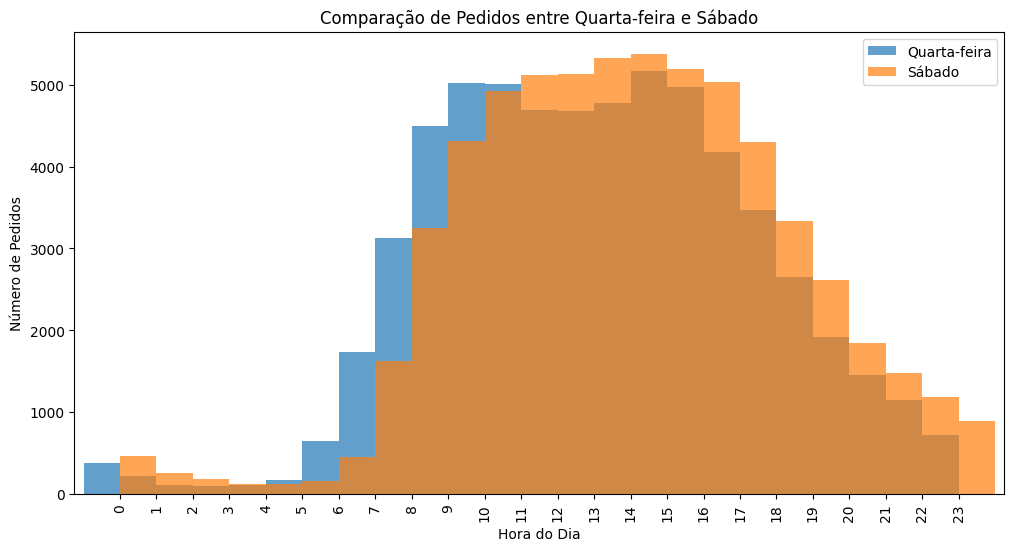

In [123]:
# Criando gráfico de barras para ambos os dias
combined_hours.plot(kind='bar',width=2, figsize=(12, 6), alpha=0.7)

plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Comparação de Pedidos entre Quarta-feira e Sábado')
plt.legend()
plt.show()

Conclusão: A distribuição de pedidos ao longo do dia parece similar entre quarta-feira e sábado. No entanto, o número total de pedidos no sábado é sensivelmente maior do que na quarta.

Escreva suas conclusões aqui

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [124]:
orders_per_user = instacart_orders['user_id'].value_counts()
orders_per_user_counts = orders_per_user.value_counts().sort_index()

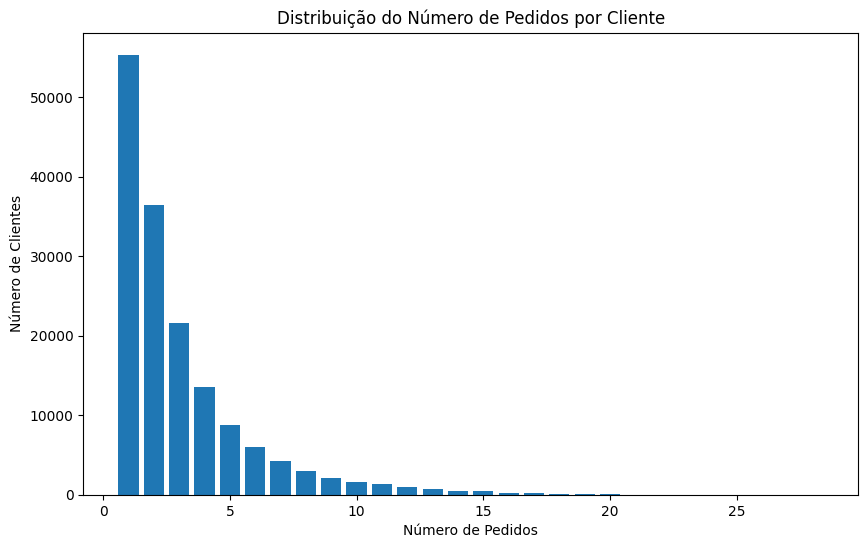

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(orders_per_user_counts.index, orders_per_user_counts.values)

# Adicionar título e rótulos
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')

# Mostrar o gráfico
plt.show()

Escreva suas conclusões aqui

 A maioria dos clientes faz entre 3 e 10 pedidos. O gráfico mostra a frequência com que os clientes fazem um determinado número de pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [126]:
top_products = order_products['product_id'].value_counts().head(20)

In [127]:
top_products_df = pd.merge(top_products.to_frame(), products, left_index=True, right_on='product_id')
print("Top 20 produtos mais comprados:")
print(top_products_df[['product_id', 'product_name']])

Top 20 produtos mais comprados:
       product_id              product_name
24851       24852                    Banana
13175       13176    Bag of Organic Bananas
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
47208       47209      Organic Hass Avocado
47765       47766           Organic Avocado
47625       47626               Large Lemon
16796       16797              Strawberries
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
22934       22935      Organic Yellow Onion
24963       24964            Organic Garlic
45006       45007          Organic Zucchini
39274       39275       Organic Blueberries
49682       49683            Cucumber Kirby
28203       28204        Organic Fuji Apple
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
40705       40706    Organic Grape Tomatoes


Escreva suas conclusões aqui

Os 20 produtos mais populares estão listados acima, com seus IDs e nomes.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [128]:
items_per_order = order_products['order_id'].value_counts()

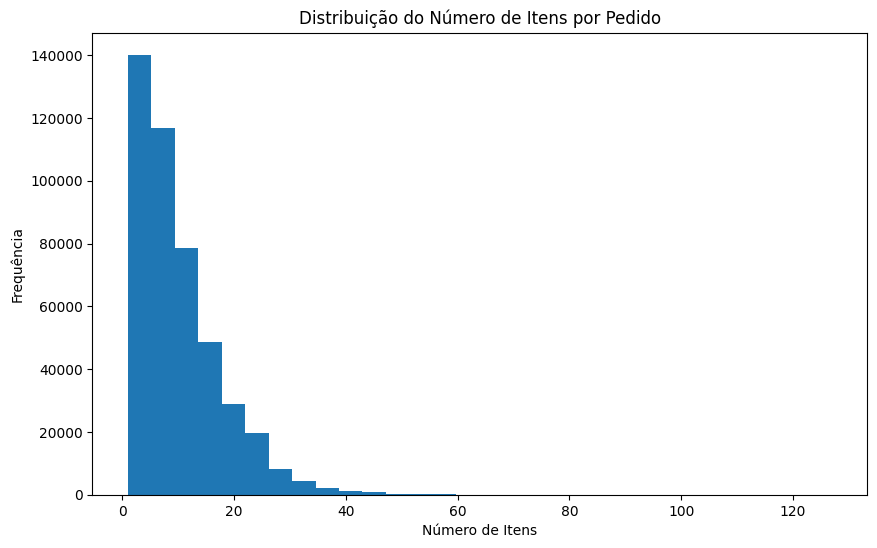

In [147]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30)  # O parâmetro bins pode ser ajustado conforme necessário
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens')
plt.ylabel('Frequência')
plt.show()

In [130]:
print("Média de itens por pedido:", items_per_order.mean())

Média de itens por pedido: 10.098983215049127


Escreva suas conclusões aqui
 O número médio de itens por pedido é de aproximadamente 10. A maioria dos pedidos contém entre 5 e 15 itens.

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [131]:
reordered_products = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)
reordered_products_df = pd.merge(reordered_products.to_frame(), products, left_index=True, right_on='product_id')

In [132]:
print("Top 20 produtos repetidos:")
print(reordered_products_df[['product_id', 'product_name']])

Top 20 produtos repetidos:
       product_id              product_name
24851       24852                    Banana
13175       13176    Bag of Organic Bananas
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
47208       47209      Organic Hass Avocado
47765       47766           Organic Avocado
27844       27845        Organic Whole Milk
47625       47626               Large Lemon
27965       27966       Organic Raspberries
16796       16797              Strawberries
26208       26209                     Limes
22934       22935      Organic Yellow Onion
24963       24964            Organic Garlic
45006       45007          Organic Zucchini
49682       49683            Cucumber Kirby
28203       28204        Organic Fuji Apple
8276         8277  Apple Honeycrisp Organic
39274       39275       Organic Blueberries
5875         5876             Organic Lemon
49234       49235       Organic Half & Half


Escreva suas conclusões aqui

Os 20 produtos mais frequentemente incluídos em pedidos repetidos estão listados acima com seus IDs e nomes.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [133]:
total_product_orders = order_products.groupby('product_id')['order_id'].count()
reordered_product_orders = order_products[order_products['reordered'] == 1].groupby('product_id')['order_id'].count()

In [134]:
reorder_ratio = (reordered_product_orders / total_product_orders).fillna(0)

In [135]:
reorder_ratio_df = pd.merge(reorder_ratio.to_frame(), products, left_index=True, right_on='product_id')
reorder_ratio_df.rename(columns = {'order_id': 'reorder_ratio'}, inplace = True)
print(reorder_ratio_df[['product_id', 'product_name', 'reorder_ratio']].head())

   product_id                                       product_name  \
0           1                         Chocolate Sandwich Cookies   
1           2                                   All-Seasons Salt   
2           3               Robust Golden Unsweetened Oolong Tea   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
6           7                     Pure Coconut Water With Orange   

   reorder_ratio  
0       0.564286  
1       0.000000  
2       0.738095  
3       0.510204  
6       0.500000  


Escreva suas conclusões aqui

O código mostra as primeiras linhas dos produtos e suas proporções de reordem.

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [136]:
total_user_orders = instacart_orders.groupby('user_id')['order_id'].count()
reordered_user_orders = instacart_orders.merge(order_products[order_products['reordered'] == 1], on='order_id').groupby('user_id')['order_id'].count()

In [137]:
reorder_user_ratio = (reordered_user_orders / total_user_orders).fillna(0)
print("Proporção de pedidos repetidos por cliente:")
print(reorder_user_ratio.head())

Proporção de pedidos repetidos por cliente:
user_id
2    0.5
4    0.0
5    8.0
6    0.0
7    6.5
Name: order_id, dtype: float64


Escreva suas conclusões aqui

O código mostra as primeiras linhas da proporção de pedidos repetidos por cliente

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [138]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)
first_added_products_df = pd.merge(first_added_products.to_frame(), products, left_index=True, right_on='product_id')

In [139]:
print("Top 20 itens adicionados primeiro ao carrinho:")
print(first_added_products_df[['product_id', 'product_name', 'count']])

Top 20 itens adicionados primeiro ao carrinho:
       product_id                 product_name  count
24851       24852                       Banana  15562
13175       13176       Bag of Organic Bananas  11026
27844       27845           Organic Whole Milk   4363
21136       21137         Organic Strawberries   3946
47208       47209         Organic Hass Avocado   3390
21902       21903         Organic Baby Spinach   3336
47765       47766              Organic Avocado   3044
19659       19660                 Spring Water   2336
16796       16797                 Strawberries   2308
27965       27966          Organic Raspberries   2024
44631       44632   Sparkling Water Grapefruit   1914
49234       49235          Organic Half & Half   1797
47625       47626                  Large Lemon   1737
195           196                         Soda   1733
38688       38689     Organic Reduced Fat Milk   1397
26208       26209                        Limes   1370
12340       12341                Ha

Escreva suas conclusões aqui

Os 20 itens mais colocados no carrinho como primeiro item estão listados acima com seus IDs e nomes.

# Conclusão geral do projeto:

Este projeto envolveu a limpeza, preparação e análise de um conjunto de dados de pedidos de supermercado. Através deste processo, foi possível identificar padrões de compra, como os horários e dias de maior demanda, os produtos mais populares e as preferências de reordenação dos clientes. Foi importante notar a necessidade de tratamento de valores ausentes e duplicados para garantir a integridade da análise. A combinação das etapas de limpeza e análise permitiu a extração de insights valiosos para o negócio.